In [ ]:
from google.colab import auth
auth.authenticate_user()

# **Factors Related To U.S. Airline Customer Satisfaction**

# Project proposal
- Business Problem: Customer satisfaction is vital to compete with airlines. Improving customer satisfaction will help stand out among airline companies, therefore we try to help them look for key factors of improving customer satisfaction by studying the dataset.
- Project Goal: Examining the various factors that are related to U.S. airline customer satisfaction.

- Goal Description:
  - To analyze and visualize relationships between the categorical variables (like Class, Customer Type, Travel Type, Age, and Gender) and satisfaction. We will also explore the leading causes of such relationships.
  - To try and predict (using multiple regression, or ML if possible) the combination of independent variables that are most likely to lead to satisfaction.

- Data description: US Airline passenger satisfaction survey
  - Content
"Satisfaction:Airline satisfaction level(Satisfaction, neutral or dissatisfaction)"

      Age:The actual age of the passengers

      Gender:Gender of the passengers (Female, Male)

      "Type of Travel:Purpose of the flight of the passengers (Personal Travel, Business Travel)"

      "Class:Travel class in the plane of the passengers (Business, Eco, Eco Plus)"

      Customer Type:The customer type (Loyal customer, disloyal customer)

      Flight distance:The flight distance of this journey

      "Inflight wifi service:Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"

      Ease of Online booking:Satisfaction level of online booking

      Inflight service:Satisfaction level of inflight service

      Online boarding:Satisfaction level of online boarding

      Inflight entertainment:Satisfaction level of inflight entertainment

      Food and drink:Satisfaction level of Food and drink

      Seat comfort:Satisfaction level of Seat comfort

      On-board service:Satisfaction level of On-board service

      Leg room service:Satisfaction level of Leg room service

      Departure/Arrival time convenient:Satisfaction level of Departure/Arrival time convenient

      Baggage handling:Satisfaction level of baggage handling

      Gate location:Satisfaction level of Gate location

      Cleanliness:Satisfaction level of Cleanliness

      Check-in service:Satisfaction level of Check-in service

      Departure Delay in Minutes:Minutes delayed when departure

      Arrival Delay in Minutes:Minutes delayed when Arrival

      Flight cancelled:Whether the Flight cancelled or not (Yes, No)

      Flight time in minutes:Minutes of Flight takes

-Dataset Source: Airline Passenger Satisfaction (https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv).
-Data source: the ultimate source of this data is not disclosed by author.


# Exploratory Questions


Initial 5 rows of our data

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT * FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` LIMIT 5

,int64_field_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,7251,101867,Female,Loyal Customer,18,Business travel,Eco,1747,0,5,5,5,0,1,4,0,4,3,4,2,4,0,86,59.0,neutral or dissatisfied
1,67666,3595,Male,Loyal Customer,26,Business travel,Eco,999,0,2,3,2,0,1,3,0,4,4,4,2,3,0,0,0.0,neutral or dissatisfied
2,46112,103275,Female,Loyal Customer,12,Business travel,Eco Plus,888,0,5,5,5,0,1,4,0,3,4,3,4,4,0,11,2.0,neutral or dissatisfied
3,17561,28156,Male,Loyal Customer,22,Business travel,Eco,569,0,5,5,5,0,1,4,0,4,5,3,3,3,0,0,0.0,neutral or dissatisfied
4,49507,55617,Female,Loyal Customer,22,Business travel,Eco Plus,404,0,1,1,1,0,1,2,0,4,5,3,2,4,0,0,0.0,neutral or dissatisfied


**Overall rating**
* average ratings for each factor
* which service is the worst?
* which service the airline does the best?





**Validity**
* KMO is between 0.7 and 0.8, indicating our dataset has a good validity

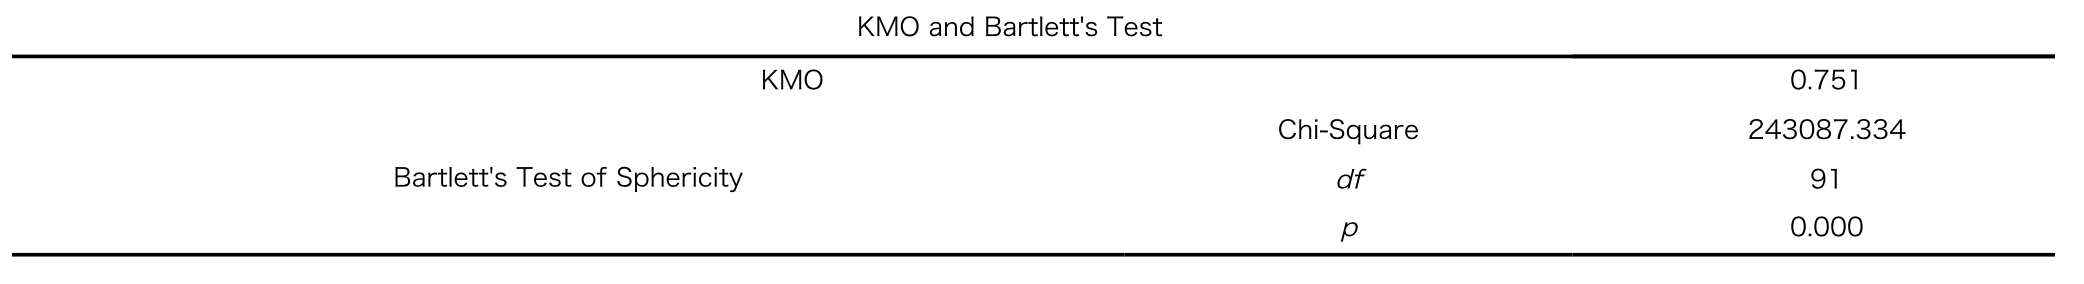

In [ ]:
%%bigquery --project=ba775-team5-b2
select satisfaction, count(satisfaction) as customer
From `ba775-team5-b2.Airline_satisfaction.satisfaction` 
group by satisfaction


,satisfaction,customer
0,neutral or dissatisfied,73452
1,satisfied,56428


In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT 
avg(Inflight_wifi_service) as Inflight_wifi_service, 
avg(Departure_Arrival_time_convenient) as Departure_Arrival_time_convenient,
avg(Ease_of_Online_booking) Ease_of_Online_booking,
avg(Gate_location) Gate_location,
avg(Food_and_drink) Food_and_drink,
avg(Online_boarding) Online_boarding,
avg(Seat_comfort) Seat_comfort,
avg(Inflight_entertainment) Inflight_entertainment,
avg(On_board_service) On_board_service,
avg(Leg_room_service) Leg_room_service,
avg(Baggage_handling) Baggage_handling,
avg(Checkin_service) Checkin_service,
avg(Inflight_service) Inflight_service,
avg(Cleanliness) Cleanliness
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` 


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326


**Categorical Variables to be analyzed**

1. Class
2. Customer Type
3. Travel Type
4. Age
5. Gender




# 1.Class




## A) What travel type is used by passengers?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Class, count(Class) as Customers FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Class

,Class,Customers
0,Eco,58309
1,Eco Plus,9411
2,Business,62160


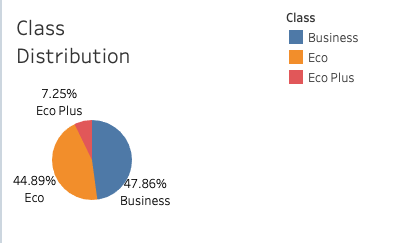

## B)   How satisfied are passengers in each travel type?


In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Class, satisfaction, count(Class) as Customers 
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Class, satisfaction order by Class desc

,Class,satisfaction,Customers
0,Eco Plus,neutral or dissatisfied,7092
1,Eco Plus,satisfied,2319
2,Eco,neutral or dissatisfied,47366
3,Eco,satisfied,10943
4,Business,neutral or dissatisfied,18994
5,Business,satisfied,43166


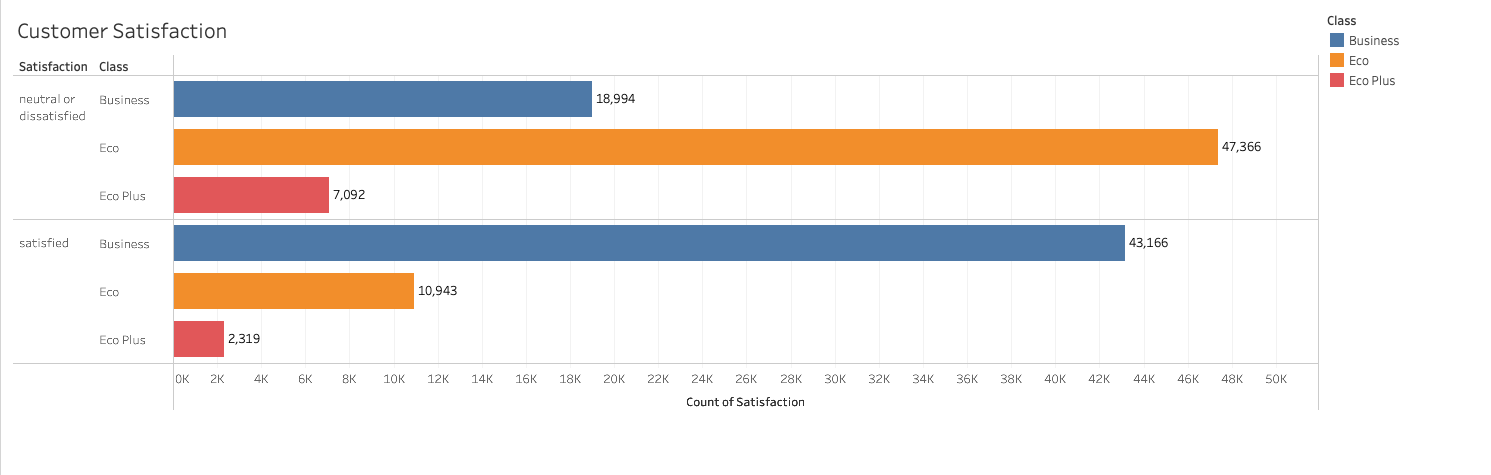



## C) What are the leading factors that make passengers of a particular travel type dissatisfied or satisfied?




In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Class, satisfaction,
avg(Inflight_wifi_service) as Inflight_wifi_service, 
avg(Departure_Arrival_time_convenient) as Departure_Arrival_time_convenient,
avg(Ease_of_Online_booking) Ease_of_Online_booking,
avg(Gate_location) Gate_location,
avg(Food_and_drink) Food_and_drink,
avg(Online_boarding) Online_boarding,
avg(Seat_comfort) Seat_comfort,
avg(Inflight_entertainment) Inflight_entertainment,
avg(On_board_service) On_board_service,
avg(Leg_room_service) Leg_room_service,
avg(Baggage_handling) Baggage_handling,
avg(Checkin_service) Checkin_service,
avg(Inflight_service) Inflight_service,
avg(Cleanliness) Cleanliness
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Class,satisfaction
order by Class

,Class,satisfaction,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,Business,neutral or dissatisfied,2.401811,2.876382,2.769348,2.993208,2.893177,2.780246,3.000790,2.694798,2.899863,2.857850,3.202538,2.918185,3.203275,2.731442
1,Business,satisfied,2.940532,2.921790,2.980031,2.981536,3.522147,4.132118,4.099407,4.054974,4.026919,3.992865,4.127485,3.786267,4.129199,3.812260
2,Eco,neutral or dissatisfied,2.397669,3.210742,2.459021,2.977304,2.992104,2.614977,3.060233,2.975658,3.073238,3.041887,3.444686,3.101444,3.462083,3.015792
3,Eco,satisfied,3.869780,3.113954,3.225806,2.936124,3.495385,3.679064,3.494928,3.619940,3.320844,3.265101,3.476286,3.223887,3.485607,3.490176
4,Eco Plus,neutral or dissatisfied,2.394388,3.272279,2.563875,2.963198,2.908206,2.624365,2.989143,2.865905,2.981387,3.001974,3.370558,2.986605,3.404540,2.917795
5,Eco Plus,satisfied,3.862009,3.019405,2.962053,2.984476,3.728762,3.684347,3.715826,3.899094,3.203967,3.222078,3.293230,3.100043,3.316516,3.732212


## D) Analysis

**Business Class** has online boarding, entertainment, board service, legroom, seat comfort, inflight service, onboard service, baggage handling, cleanliness wifi, food+drink as ratings that are related to satisfaction.

**Variables that are less relevant** = departure convenience, ease of booking, gate location

**Economy Class and Eco plus** has wifi, online boarding, inflight entertainment, ease of booking, food + drink, seat comfort, cleanliness as relevant variables

**Variables that are less relevant** = departure convenience, gate location, onboard service, leg room service, baggage handling, inflight service, check-in service

Shared importance
- Online boarding *** 
- entertainment 
- wifi
- seat comfort
- cleanliness
- food + drink








###  Based on the assumption, which variables are statistically relevant based on count?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Class, Online_boarding_rates, Inflight_wifi_service_rates, Seat_comfort_rates, Baggage_handling_rates, Cleanliness_rates, On_board_service_Rates, count(*) customer
FROM 
(SELECT Class, CASE
WHEN Online_boarding between 1 and 3 then '1-3' 
when Online_boarding between 4 and 5 then '4-5'
else '0'
end Online_boarding_rates,
case
when Inflight_wifi_service between 1 and 3 then '1-3'
when Inflight_wifi_service between 4 and 5 then '4-5'
else '0'
End Inflight_wifi_service_rates,
case
when Seat_comfort between 1 and 3 then '1-3'
when Seat_comfort between 4 and 5 then '4-5'
else '0'
End Seat_comfort_rates,
case
when Baggage_handling between 1 and 3 then '1-3'
when Baggage_handling between 4 and 5 then '4-5'
else '0'
End Baggage_handling_rates,
case
when Cleanliness between 1 and 3 then '1-3'
when Cleanliness between 4 and 5 then '4-5'
else '0'
End Cleanliness_rates,
case
when On_board_service between 1 and 3 then '1-3'
when On_board_service between 4 and 5 then '4-5'
else '0'
end On_board_service_Rates
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
)
group by Class, Online_boarding_rates, Inflight_wifi_service_rates, Seat_comfort_rates, Baggage_handling_rates, Cleanliness_rates, On_board_service_Rates


,Class,Online_boarding_rates,Inflight_wifi_service_rates,Seat_comfort_rates,Baggage_handling_rates,Cleanliness_rates,On_board_service_Rates,customer
0,Eco,1-3,0,4-5,4-5,0,4-5,1
1,Eco,1-3,0,1-3,4-5,0,4-5,1
2,Eco Plus,1-3,0,4-5,1-3,0,1-3,1
3,Eco,1-3,0,4-5,1-3,0,4-5,1
4,Eco Plus,1-3,0,1-3,1-3,0,4-5,2
...,...,...,...,...,...,...,...,...
401,Business,0,4-5,4-5,4-5,4-5,4-5,6
402,Eco Plus,1-3,0,4-5,4-5,1-3,4-5,1
403,Eco Plus,0,1-3,1-3,1-3,4-5,4-5,2
404,Eco Plus,0,4-5,4-5,1-3,4-5,4-5,1


### a) Customer Ratings for Business Class 

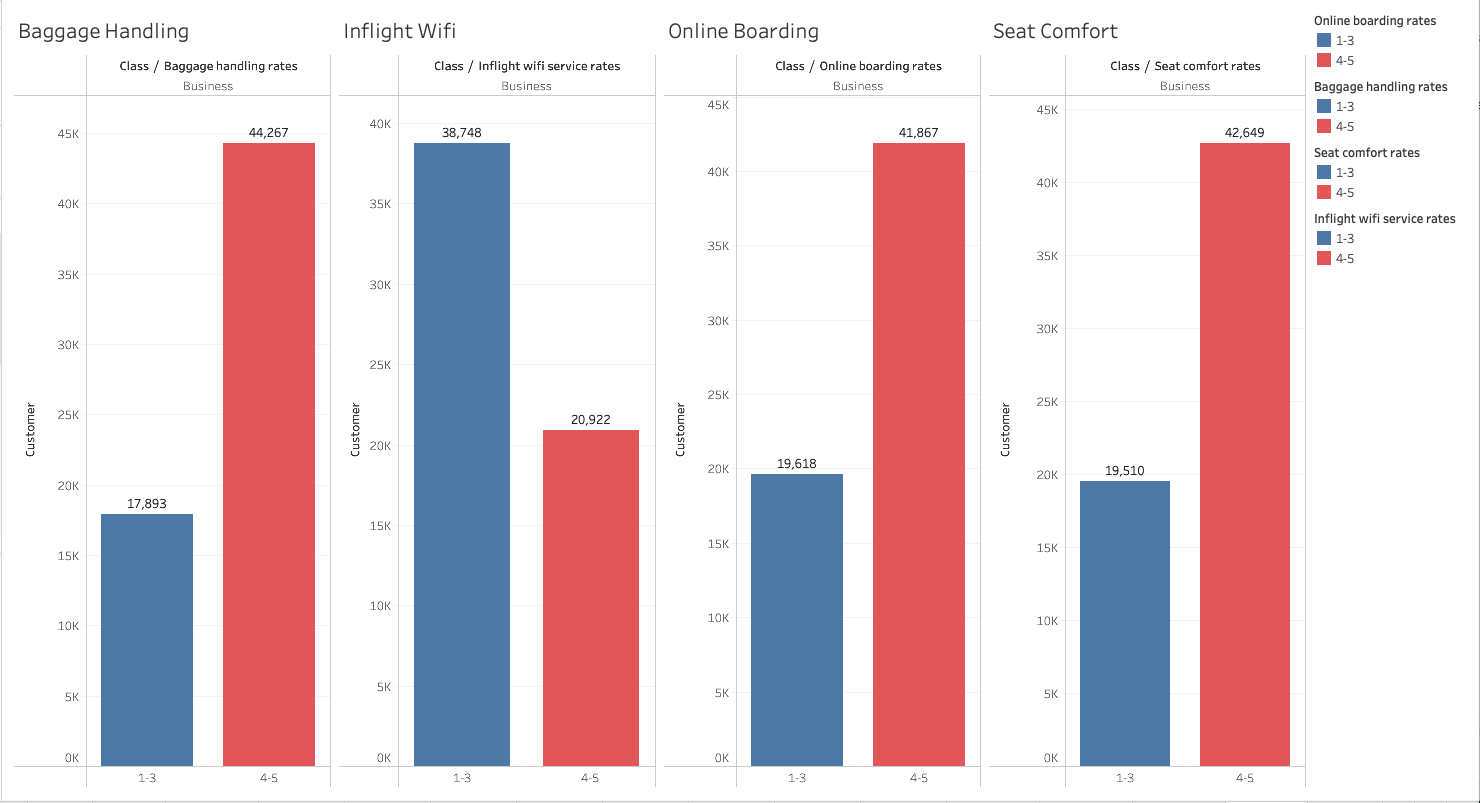

### b) Customer Ratings for Economy Class

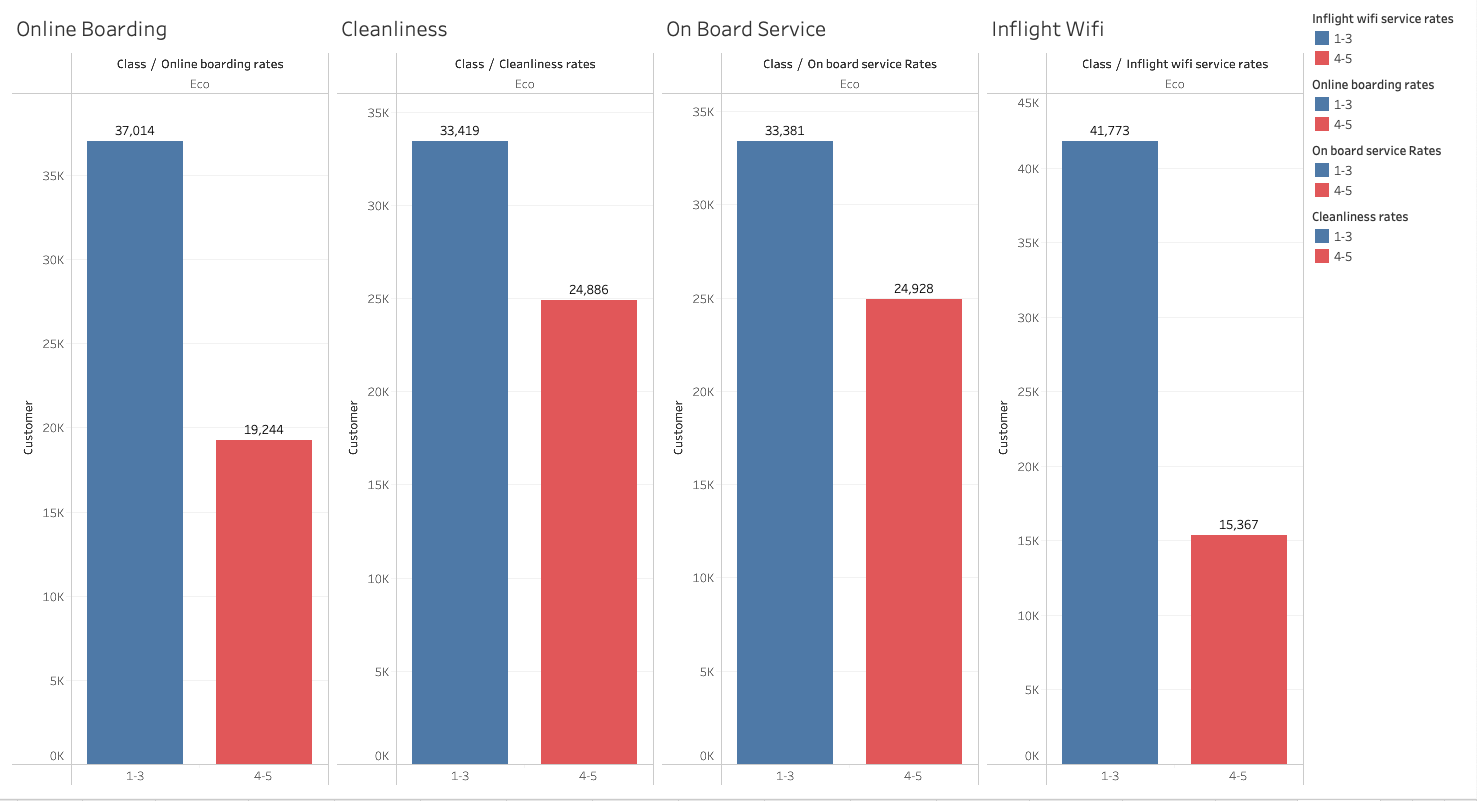

### c) Customer Ratings for Economy Plus

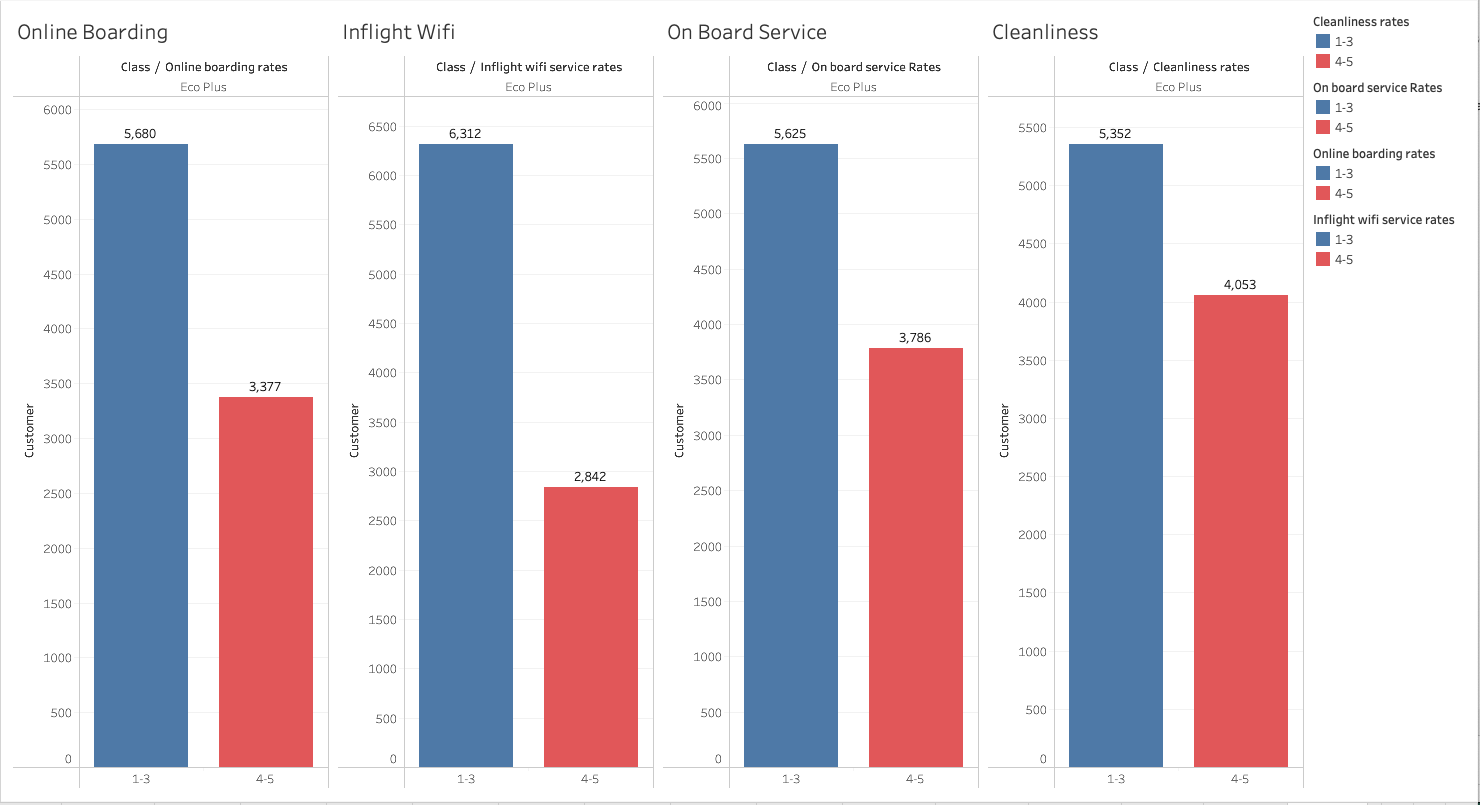

# 2.Customer Type


### A) What are the customer types of passengers?

In [ ]:
  %%bigquery --project=ba775-team5-b2
SELECT Customer_Type, count(Customer_Type) as Customers FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Customer_Type

,Customer_Type,Customers
0,Loyal Customer,106100
1,disloyal Customer,23780


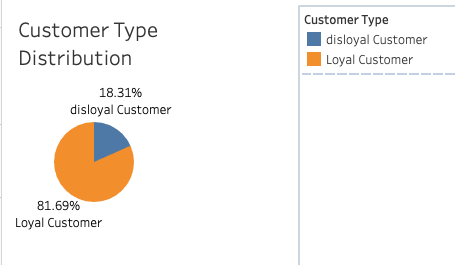

### B) How satisfied are passengers in each customer type?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Customer_Type, satisfaction, count(satisfaction) as Customers
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Customer_Type, satisfaction


,Customer_Type,satisfaction,Customers
0,Loyal Customer,neutral or dissatisfied,55372
1,disloyal Customer,satisfied,5700
2,Loyal Customer,satisfied,50728
3,disloyal Customer,neutral or dissatisfied,18080


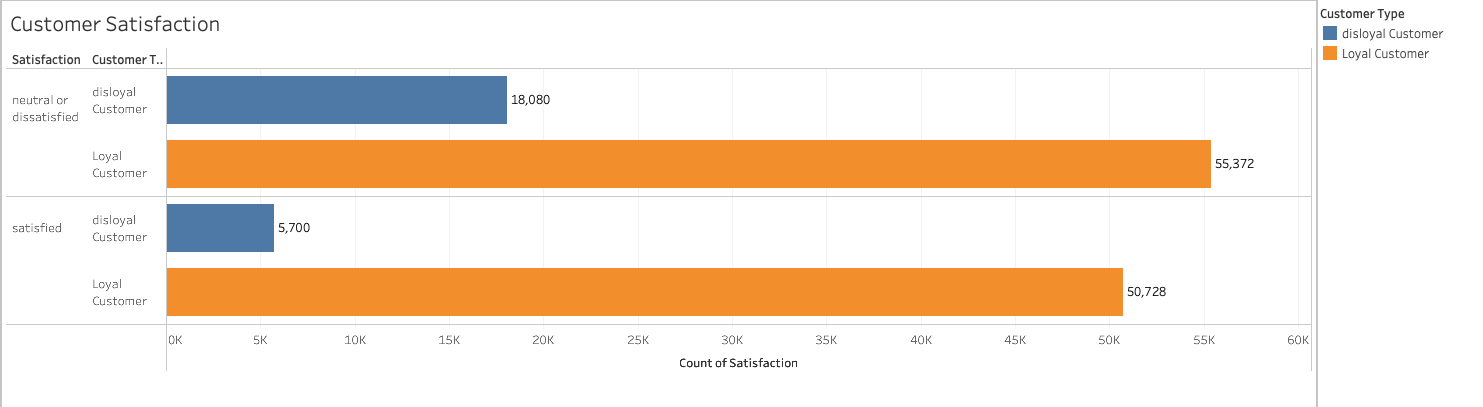

### C) What are the leading factors that make a particular type of customer dissatisfied or satisfied?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Customer_Type, satisfaction,
avg(Inflight_wifi_service) as Inflight_wifi_service, 
avg(Departure_Arrival_time_convenient) as Departure_Arrival_time_convenient,
avg(Ease_of_Online_booking) Ease_of_Online_booking,
avg(Gate_location) Gate_location,
avg(Food_and_drink) Food_and_drink,
avg(Online_boarding) Online_boarding,
avg(Seat_comfort) Seat_comfort,
avg(Inflight_entertainment) Inflight_entertainment,
avg(On_board_service) On_board_service,
avg(Leg_room_service) Leg_room_service,
avg(Baggage_handling) Baggage_handling,
avg(Checkin_service) Checkin_service,
avg(Inflight_service) Inflight_service,
avg(Cleanliness) Cleanliness
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Customer_Type,satisfaction

,Customer_Type,satisfaction,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,Loyal Customer,neutral or dissatisfied,2.400058,3.406469,2.600014,2.960269,2.937712,2.735010,3.050441,2.843567,2.998230,2.932240,3.313028,3.036878,3.329697,2.893719
1,disloyal Customer,satisfied,3.724737,2.727544,3.683684,2.825088,3.117018,3.628246,3.025263,3.114211,3.714561,3.385439,4.105439,3.733684,4.102982,3.086842
2,Loyal Customer,satisfied,3.094997,2.989532,2.953162,2.989454,3.571341,4.070533,4.072169,4.059711,3.872082,3.868889,3.951348,3.639489,3.956158,3.820632
3,disloyal Customer,neutral or dissatisfied,2.393418,2.284181,2.394358,3.040653,3.021847,2.424668,2.999889,3.042091,3.084790,3.168695,3.564436,3.061615,3.573064,3.052489


### D) Analysis
- With regards to Customer type, Inflight wifi service, food, and drink, online boarding, seat comfort, inflight entertainment, and cleanliness seem to be the leading causes of dissatisfaction for Loyal Customer.
- For disloyal Customers, inflight wifi service, ease of online booking, and online boarding are the potential leading causes of dissatisfaction. 
-Shared importance
  - Online boarding *** (both)
  - wifi **(both, but disloyal customer sees greater disperity )
  - Inflight entertainment (Loyal)
  - cleanliness (Loyal)
  - leg_room (Loyal)
  - On Board Service (both)


### Based on the assumption, which variables are statistically relevant based on count?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Customer_Type, Online_boarding_rates, Inflight_wifi_service_rates, Seat_comfort_rates, Baggage_handling_rates, Cleanliness_rates, On_board_service_Rates, count(*) customer
FROM 
(SELECT Customer_Type, CASE
WHEN Online_boarding between 1 and 3 then '1-3' 
when Online_boarding between 4 and 5 then '4-5'
else '0'
end Online_boarding_rates,
case
when Inflight_wifi_service between 1 and 3 then '1-3'
when Inflight_wifi_service between 4 and 5 then '4-5'
else '0'
End Inflight_wifi_service_rates,
case
when Seat_comfort between 1 and 3 then '1-3'
when Seat_comfort between 4 and 5 then '4-5'
else '0'
End Seat_comfort_rates,
case
when Baggage_handling between 1 and 3 then '1-3'
when Baggage_handling between 4 and 5 then '4-5'
else '0'
End Baggage_handling_rates,
case
when Cleanliness between 1 and 3 then '1-3'
when Cleanliness between 4 and 5 then '4-5'
else '0'
End Cleanliness_rates,
case
when On_board_service between 1 and 3 then '1-3'
when On_board_service between 4 and 5 then '4-5'
else '0'
end On_board_service_Rates
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
)
group by Customer_Type, Online_boarding_rates, Inflight_wifi_service_rates, Seat_comfort_rates, Baggage_handling_rates, Cleanliness_rates, On_board_service_Rates

,Customer_Type,Online_boarding_rates,Inflight_wifi_service_rates,Seat_comfort_rates,Baggage_handling_rates,Cleanliness_rates,On_board_service_Rates,customer
0,Loyal Customer,1-3,0,4-5,4-5,0,4-5,1
1,Loyal Customer,1-3,0,1-3,4-5,0,4-5,1
2,Loyal Customer,1-3,0,4-5,1-3,0,1-3,1
3,Loyal Customer,1-3,0,4-5,1-3,0,4-5,1
4,Loyal Customer,1-3,0,1-3,1-3,0,4-5,2
...,...,...,...,...,...,...,...,...
284,disloyal Customer,0,1-3,1-3,4-5,4-5,1-3,1
285,disloyal Customer,1-3,4-5,1-3,4-5,4-5,1-3,2
286,disloyal Customer,1-3,4-5,1-3,1-3,4-5,1-3,2
287,Loyal Customer,0,4-5,1-3,1-3,4-5,1-3,1


####  a) Customer Ratings for Loyal Customers 




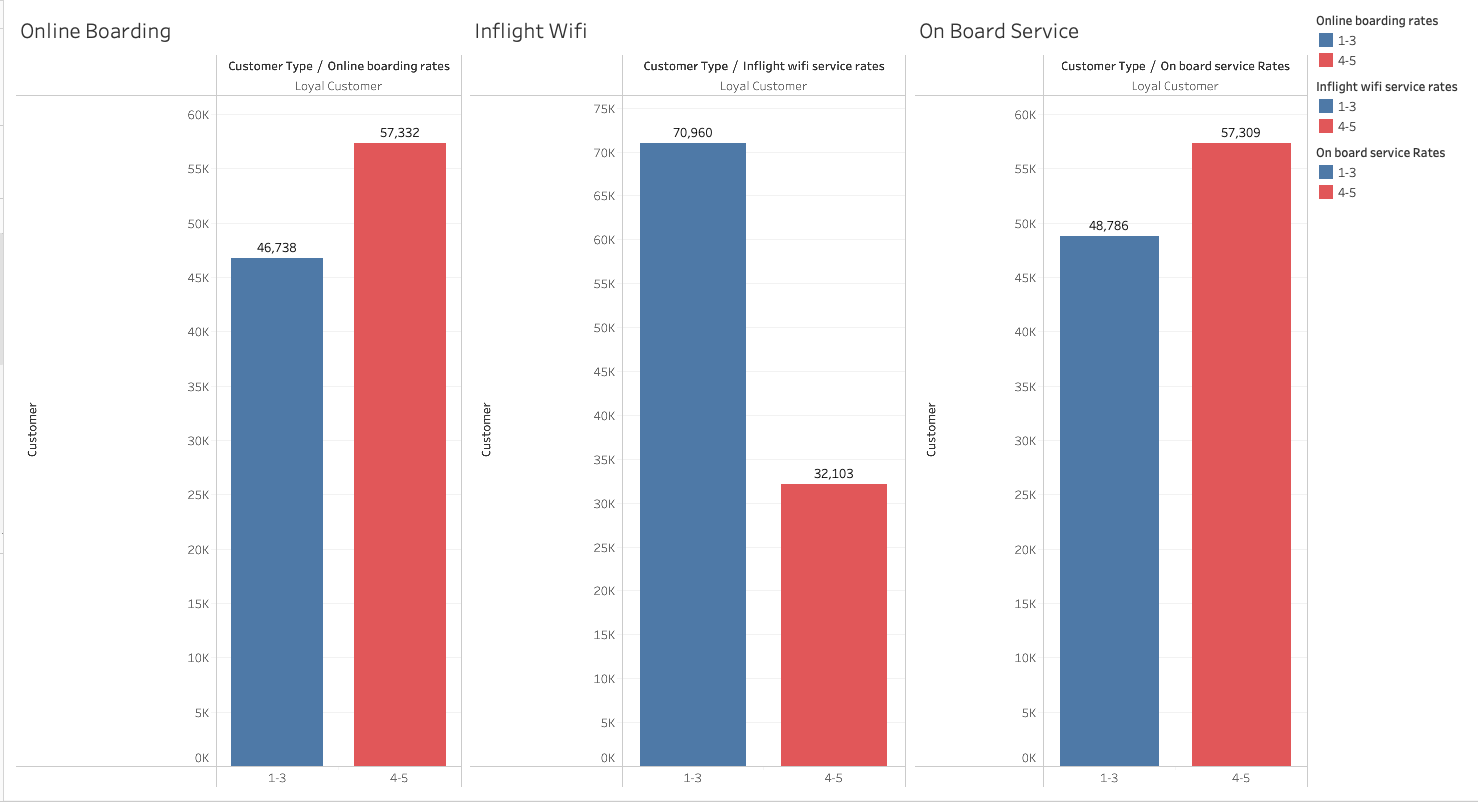

#### b) Customer Ratings for Disloyal Customers 

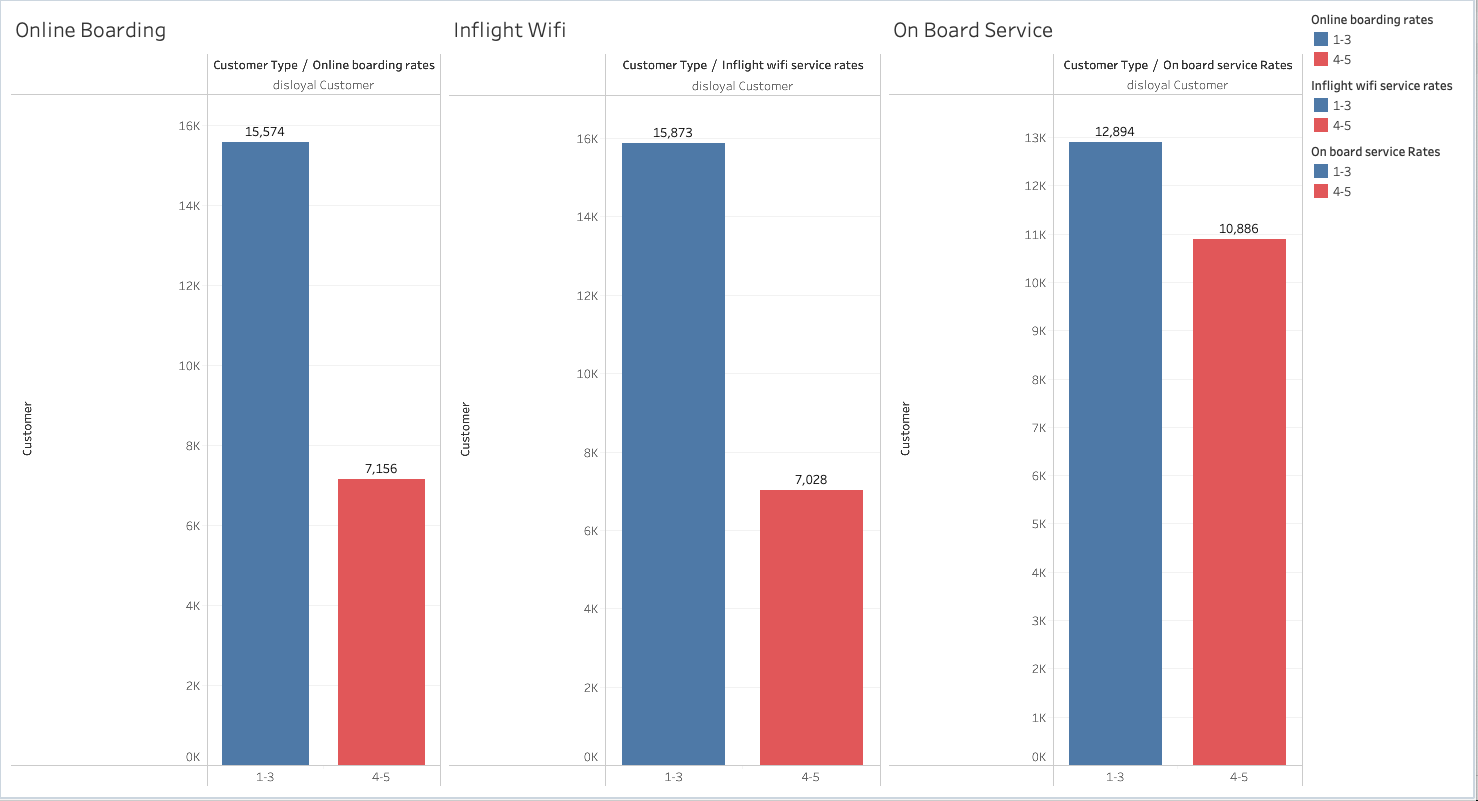

# 3.Travel Type


### A) How many people are in each travel type?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Travel_Type,
COUNT (*) AS Number_of_people
FROM
(SELECT CASE 
WHEN type_of_travel = 'Business travel' THEN 'Business travel'
WHEN type_of_travel = 'Personal Travel' THEN 'Personal travel'
END AS Travel_Type
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
) 
Group BY Travel_Type
ORDER BY Travel_Type

,Travel_Type,Number_of_people
0,Business travel,89693
1,Personal travel,40187


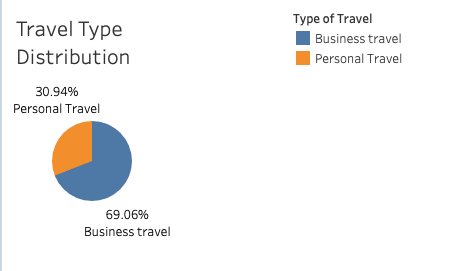

### B) How satisfied are passengers in each travel type?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT type_of_travel, satisfaction, count(satisfaction) as Customers
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by type_of_travel, satisfaction


,type_of_travel,satisfaction,Customers
0,Business travel,neutral or dissatisfied,37337
1,Business travel,satisfied,52356
2,Personal Travel,satisfied,4072
3,Personal Travel,neutral or dissatisfied,36115


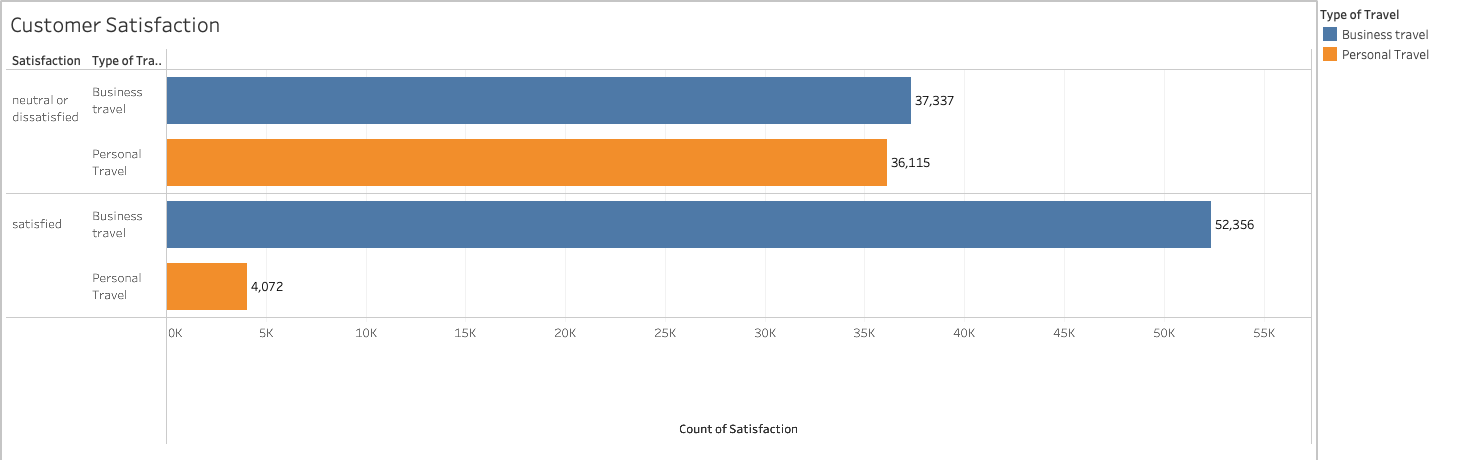

### C) How do different travel type groups rate each service?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Travel_Type,
satisfaction,
AVG(Inflight_wifi_service) AS Inflight_Avg_Rate,
AVG(Departure_Arrival_time_convenient) AS Departure_Avg_Rate,
AVG(Ease_of_Online_booking) AS Ease_Avg_Rate,
AVG(Gate_location	) AS Gate_Avg_Rate,
AVG(Online_boarding) AS Online_Avg_Rate,
AVG(Food_and_drink) AS Food_Avg_Rate,
AVG(Seat_comfort) AS Seat_Avg_Rate,
AVG(Inflight_entertainment) AS Inflight_Avg_Rate,
AVG(On_board_service) AS On_board_Avg_Rate,
AVG(Leg_room_service) AS Leg_Avg_Rate,
AVG(Baggage_handling) AS Baggage_Avg_Rate,
AVG(Checkin_service) AS Checkin_Avg_Rate,
AVG(Inflight_service) AS Inflight_Avg_Rate,
AVG(Cleanliness) AS Cleanliness_Avg_Rate,
AVG(Departure_Delay_in_Minutes) AS Departure_Avg_Rate,
AVG(Arrival_Delay_in_Minutes) AS Arrival_Avg_Rate,
FROM
(SELECT satisfaction,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Online_boarding,Food_and_drink,Seat_comfort,Inflight_entertainment,
On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes, CASE 

WHEN type_of_travel = 'Business travel' THEN 'Business travel'
WHEN type_of_travel = 'Personal Travel' THEN 'Personal travel'
END AS Travel_Type
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
) 
Group BY Travel_Type, satisfaction
ORDER BY Travel_Type

,Travel_Type,satisfaction,Inflight_Avg_Rate,Departure_Avg_Rate,Ease_Avg_Rate,Gate_Avg_Rate,Online_Avg_Rate,Food_Avg_Rate,Seat_Avg_Rate,Inflight_Avg_Rate_1,On_board_Avg_Rate,Leg_Avg_Rate,Baggage_Avg_Rate,Checkin_Avg_Rate,Inflight_Avg_Rate_2,Cleanliness_Avg_Rate,Departure_Avg_Rate_1,Arrival_Avg_Rate
0,Business travel,neutral or dissatisfied,2.401103,2.634732,2.724697,3.036130,2.599138,2.857327,2.893403,2.734714,2.778424,2.927739,3.182420,2.760211,3.186330,2.750435,17.572381,18.409098
1,Business travel,satisfied,3.123692,2.909046,2.995340,2.978493,4.065647,3.557758,4.025346,4.036577,3.902437,3.863359,3.997479,3.672091,3.999045,3.795955,12.933245,12.981554
2,Personal travel,satisfied,3.607564,3.657662,3.433448,2.900295,3.514244,3.110020,3.208743,3.033644,3.261297,3.263261,3.573919,3.352161,3.610265,3.110756,7.065079,6.769914
3,Personal travel,neutral or dissatisfied,2.395653,3.642475,2.368157,2.922082,2.720116,3.062938,3.187484,3.055489,3.268808,3.055268,3.573917,3.335290,3.599751,3.121335,15.201855,15.655848


### D) Analysis

**Business Travel** has online boarding, food+drink, legroom, seat comfort, inflight service, onboard service, baggage handling, cleanliness as ratings that are related to high satisfaction.

**Variables that leads to less satisfaction** : inflight wifi service, departure and arrival time convenience, ease of online booking, and gate location

**Personal Travel** has departure and arrival time convenient, on-board service, baggage handling, check-in service as ratings that are related to high satisfaction.

**Variables that leads to less satisfaction** : inflight wifi service, ease of online booking, gate location, online boarding, food and drink, seat comfort, Inflight entertainment, leg room, and cleanliness

Shared importance: 
- inflight wifi service (both)
- online boarding (both)
- cleanliness (business)



In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT type_of_travel, Online_boarding_rates, Inflight_wifi_service_rates, Seat_comfort_rates, Baggage_handling_rates, Cleanliness_rates, On_board_service_Rates, count(*) customer
FROM 
(SELECT type_of_travel, CASE
WHEN Online_boarding between 1 and 3 then '1-3' 
when Online_boarding between 4 and 5 then '4-5'
else '0'
end Online_boarding_rates,
case
when Inflight_wifi_service between 1 and 3 then '1-3'
when Inflight_wifi_service between 4 and 5 then '4-5'
else '0'
End Inflight_wifi_service_rates,
case
when Seat_comfort between 1 and 3 then '1-3'
when Seat_comfort between 4 and 5 then '4-5'
else '0'
End Seat_comfort_rates,
case
when Baggage_handling between 1 and 3 then '1-3'
when Baggage_handling between 4 and 5 then '4-5'
else '0'
End Baggage_handling_rates,
case
when Cleanliness between 1 and 3 then '1-3'
when Cleanliness between 4 and 5 then '4-5'
else '0'
End Cleanliness_rates,
case
when On_board_service between 1 and 3 then '1-3'
when On_board_service between 4 and 5 then '4-5'
else '0'
end On_board_service_Rates
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
)
group by type_of_travel, Online_boarding_rates, Inflight_wifi_service_rates, Seat_comfort_rates, Baggage_handling_rates, Cleanliness_rates, On_board_service_Rates

,type_of_travel,Online_boarding_rates,Inflight_wifi_service_rates,Seat_comfort_rates,Baggage_handling_rates,Cleanliness_rates,On_board_service_Rates,customer
0,Business travel,1-3,0,4-5,4-5,0,4-5,1
1,Business travel,1-3,0,1-3,4-5,0,4-5,1
2,Business travel,1-3,0,4-5,1-3,0,1-3,1
3,Business travel,1-3,0,4-5,1-3,0,4-5,1
4,Business travel,1-3,0,1-3,1-3,0,4-5,2
...,...,...,...,...,...,...,...,...
288,Business travel,0,4-5,4-5,1-3,4-5,1-3,3
289,Business travel,0,4-5,4-5,4-5,4-5,4-5,8
290,Business travel,0,4-5,4-5,1-3,4-5,4-5,2
291,Personal Travel,0,4-5,1-3,1-3,4-5,1-3,1


#### a) Customer Ratings for Business Travel 


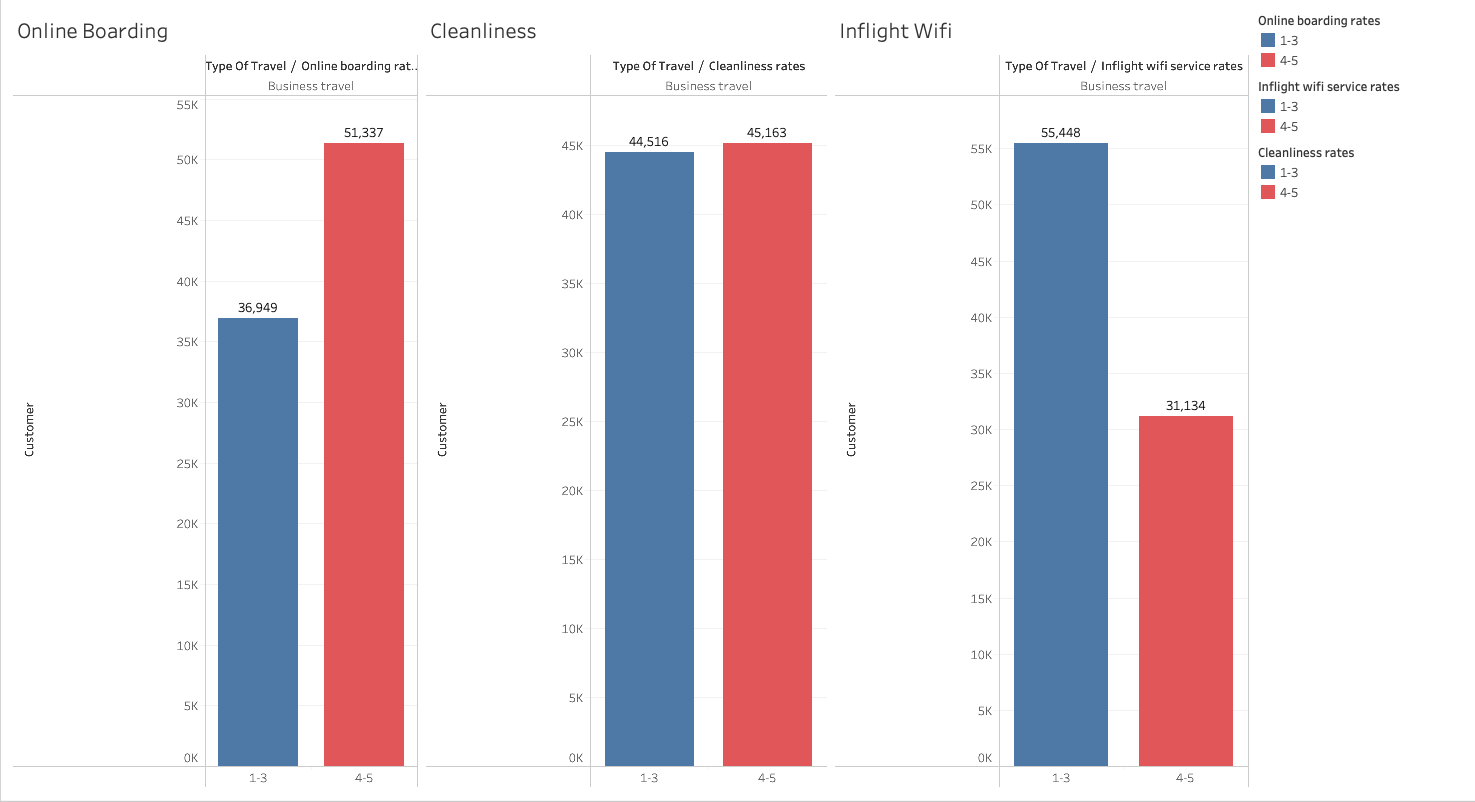

#### b) Customer Ratings for Personal Travel


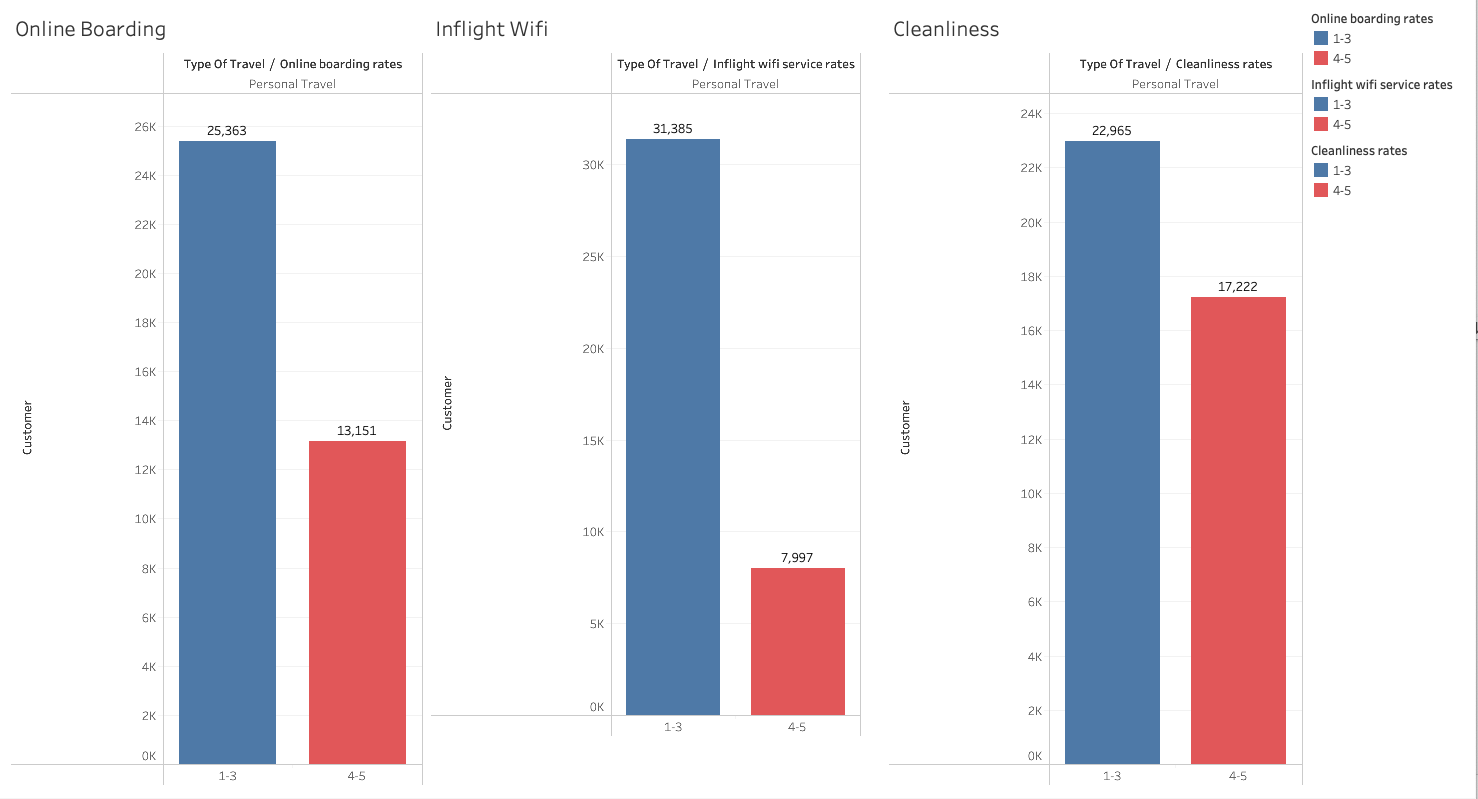

# 4.Age


## A) How many people are in each category?





In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Age_Group,
COUNT (*) AS Number_of_people
FROM
(SELECT CASE 
WHEN age>=0
AND age <=18 THEN '0-18'
WHEN age >=19 AND age<=35 THEN '19-35'
WHEN age >=36 AND age <=59 THEN '36-59'
WHEN age >= 60 THEN '60+'
END AS Age_Group
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
) 
Group BY Age_Group 
ORDER BY Age_Group 

,Age_Group,Number_of_people
0,0-18,11070
1,19-35,40675
2,36-59,65920
3,60+,12215


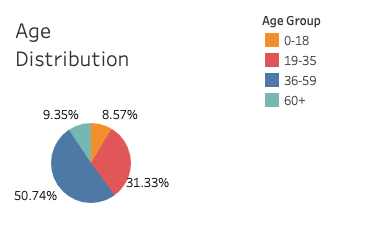

## B) How do different age groups rate each service?


In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Age_Group,
satisfaction,
COUNT(Age_Group) AS Number_of_people
FROM
(SELECT satisfaction,CASE 
WHEN age>=0
AND age <=18 THEN '0-18'
WHEN age >=19 AND age<=35 THEN '19-35'
WHEN age >=36 AND age <=59 THEN '36-59'
WHEN age >= 60 THEN '60+'
END AS Age_Group
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
) 
Group BY Age_Group,satisfaction 
ORDER BY Age_Group,satisfaction

,Age_Group,satisfaction,Number_of_people
0,0-18,neutral or dissatisfied,9120
1,0-18,satisfied,1950
2,19-35,neutral or dissatisfied,25747
3,19-35,satisfied,14928
4,36-59,neutral or dissatisfied,29676
5,36-59,satisfied,36244
6,60+,neutral or dissatisfied,8909
7,60+,satisfied,3306


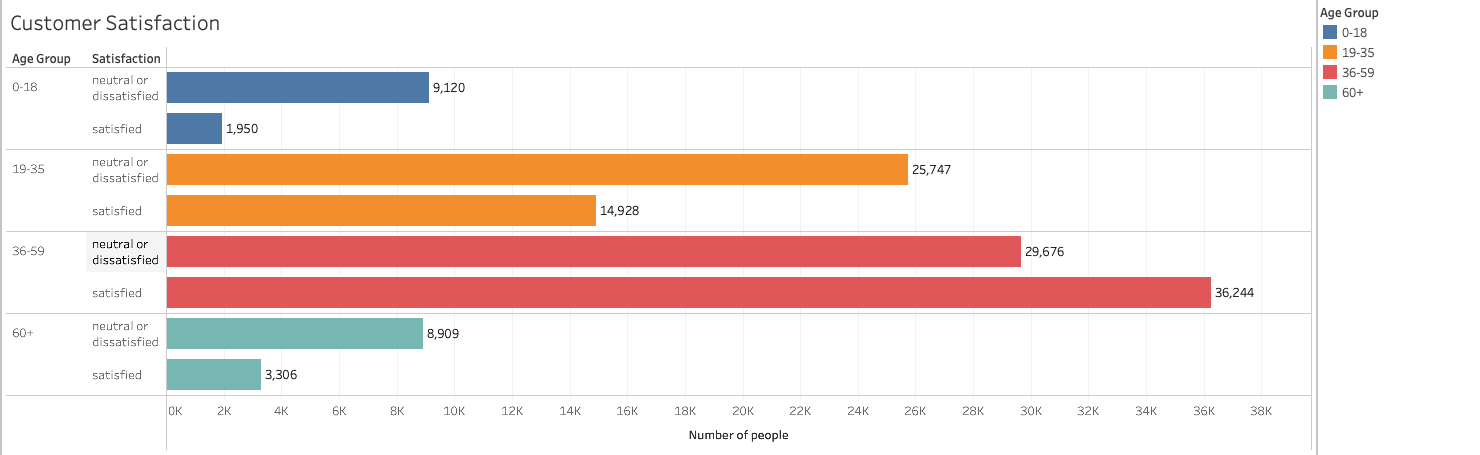

## C) How satisfied are passengers in each age group?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Age_Group,
satisfaction,
AVG(Inflight_wifi_service) AS Inflight_Avg_Rate,
AVG(Departure_Arrival_time_convenient) AS Departure_Avg_Rate,
AVG(Ease_of_Online_booking) AS Ease_Avg_Rate,
AVG(Gate_location	) AS Gate_Avg_Rate,
AVG(Online_boarding) AS Online_Avg_Rate,
AVG(Food_and_drink) AS Food_Avg_Rate,
AVG(Seat_comfort) AS Seat_Avg_Rate,
AVG(Inflight_entertainment) AS Inflight_Avg_Rate,
AVG(On_board_service) AS On_board_Avg_Rate,
AVG(Leg_room_service) AS Leg_Avg_Rate,
AVG(Baggage_handling) AS Baggage_Avg_Rate,
AVG(Checkin_service) AS Checkin_Avg_Rate,
AVG(Inflight_service) AS Inflight_Avg_Rate,
AVG(Cleanliness) AS Cleanliness_Avg_Rate,
AVG(Departure_Delay_in_Minutes) AS Departure_Avg_Rate,
AVG(Arrival_Delay_in_Minutes) AS Arrival_Avg_Rate,
FROM
(SELECT satisfaction, Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Online_boarding,Food_and_drink,Seat_comfort,Inflight_entertainment,
On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes, CASE 

WHEN age>=0
AND age <=18 THEN '0-18'
WHEN age >=19 AND age<=35 THEN '19-35'
WHEN age >=36 AND age <=59 THEN '36-59'
WHEN age >= 60 THEN '60+'
END AS Age_Group
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
) 
Group BY Age_Group, satisfaction
ORDER BY Age_Group

,Age_Group,satisfaction,Inflight_Avg_Rate,Departure_Avg_Rate,Ease_Avg_Rate,Gate_Avg_Rate,Online_Avg_Rate,Food_Avg_Rate,Seat_Avg_Rate,Inflight_Avg_Rate_1,On_board_Avg_Rate,Leg_Avg_Rate,Baggage_Avg_Rate,Checkin_Avg_Rate,Inflight_Avg_Rate_2,Cleanliness_Avg_Rate,Departure_Avg_Rate_1,Arrival_Avg_Rate
0,0-18,neutral or dissatisfied,2.400110,3.378618,2.440132,2.973465,2.390461,2.946711,2.923465,2.978509,3.152522,3.206908,3.662829,3.161294,3.678399,2.966228,17.047807,17.843217
1,0-18,satisfied,3.455897,3.126667,3.296923,2.937436,3.729231,3.463077,3.390256,3.470256,3.436410,3.229231,3.794359,3.478462,3.807179,3.463077,7.878462,7.435924
2,19-35,neutral or dissatisfied,2.393250,2.935138,2.516449,2.996427,2.421369,2.917816,2.901853,2.924651,3.062454,3.145493,3.539830,3.048705,3.560143,2.935099,16.256729,16.898051
3,19-35,satisfied,3.231109,2.843917,3.109124,2.943261,3.864416,3.707730,3.730774,3.779073,3.608119,3.380158,3.872120,3.566452,3.888934,3.730640,12.639603,12.734328
4,36-59,neutral or dissatisfied,2.403626,3.137182,2.612852,2.974019,2.835086,2.977457,3.121445,2.838927,2.951038,2.854327,3.202419,2.987633,3.211282,2.899919,16.504246,17.162218
5,36-59,satisfied,3.110473,2.995834,2.981818,2.990454,4.123138,3.468050,4.107052,4.071350,3.983390,4.026818,4.022459,3.704172,4.021548,3.782999,12.895238,12.932610
6,60+,neutral or dissatisfied,2.394320,3.416545,2.545067,2.959591,3.030980,3.024357,3.270737,2.889438,2.987541,2.774161,3.178134,3.089572,3.195084,3.001459,15.860029,16.352590
7,60+,satisfied,3.183606,3.045372,2.991531,2.934362,3.863279,3.368421,3.828494,3.916818,3.829099,3.888082,3.887780,3.517544,3.883848,3.585299,10.429522,10.255170


## D) Analysis
- Statistically relevant variables: Ease of online booking, food + drink, seat comfort, inflight entertainment, and cleanliness

- The most effective ratings for customer satisfaction among age groups:
  - Online boarding 
  - Inflight Wifi 
  - Inflight entertainment

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT  Age_Group, Online_boarding_rates, Inflight_wifi_service_rates, Inflight_entertainment, count(*) customer
FROM 
(SELECT 
CASE 
WHEN age>=0
AND age <=18 THEN '0-18'
WHEN age >=19 AND age<=35 THEN '19-35'
WHEN age >=36 AND age <=59 THEN '36-59'
WHEN age >= 60 THEN '60+'
END AS Age_Group,
CASE
WHEN Online_boarding between 1 and 3 THEN '1-3' 
WHEN Online_boarding between 4 and 5 THEN '4-5'
else '0'
end Online_boarding_rates,
Case
when Inflight_wifi_service between 1 and 3 THEN '1-3'
when Inflight_wifi_service between 4 and 5 THEN '4-5'
else '0'
End Inflight_wifi_service_rates,
Case
WHEN Inflight_entertainment between 1 and 3 THEN '1-3' 
when Inflight_entertainment between 4 and 5 THEN '4-5'
else '0'
end Inflight_entertainment
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`
)
GROUP BY Age_Group, Online_boarding_rates, Inflight_wifi_service_rates, Inflight_entertainment

### a) Customer Ratings for Online Boarding by age group

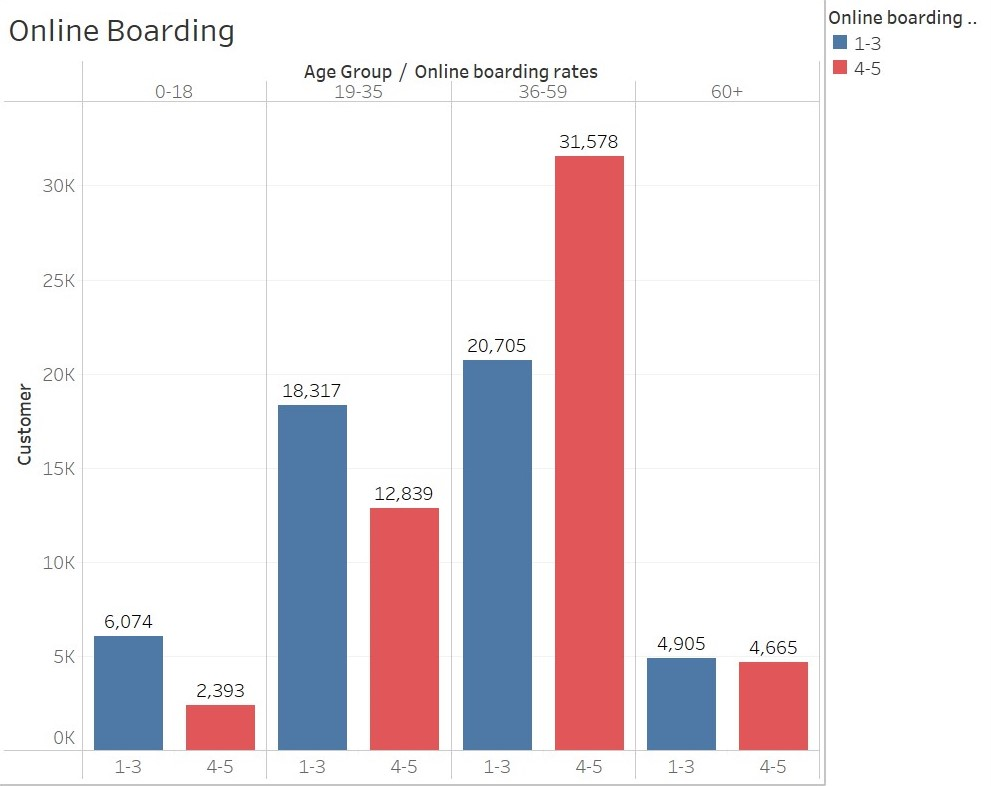

### b) Customer Ratings for Inflight Wifi Service by age group

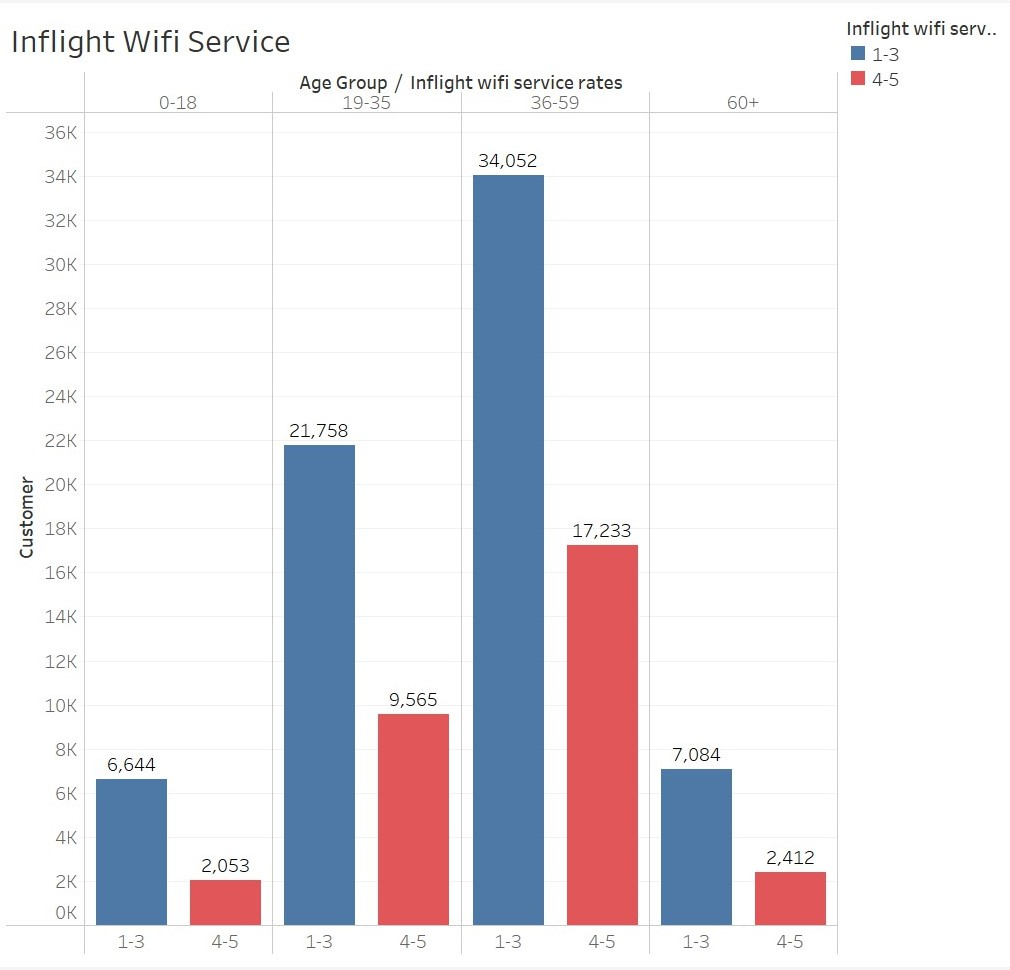

### c) Customer Ratings for Inflight Entertainment by age group

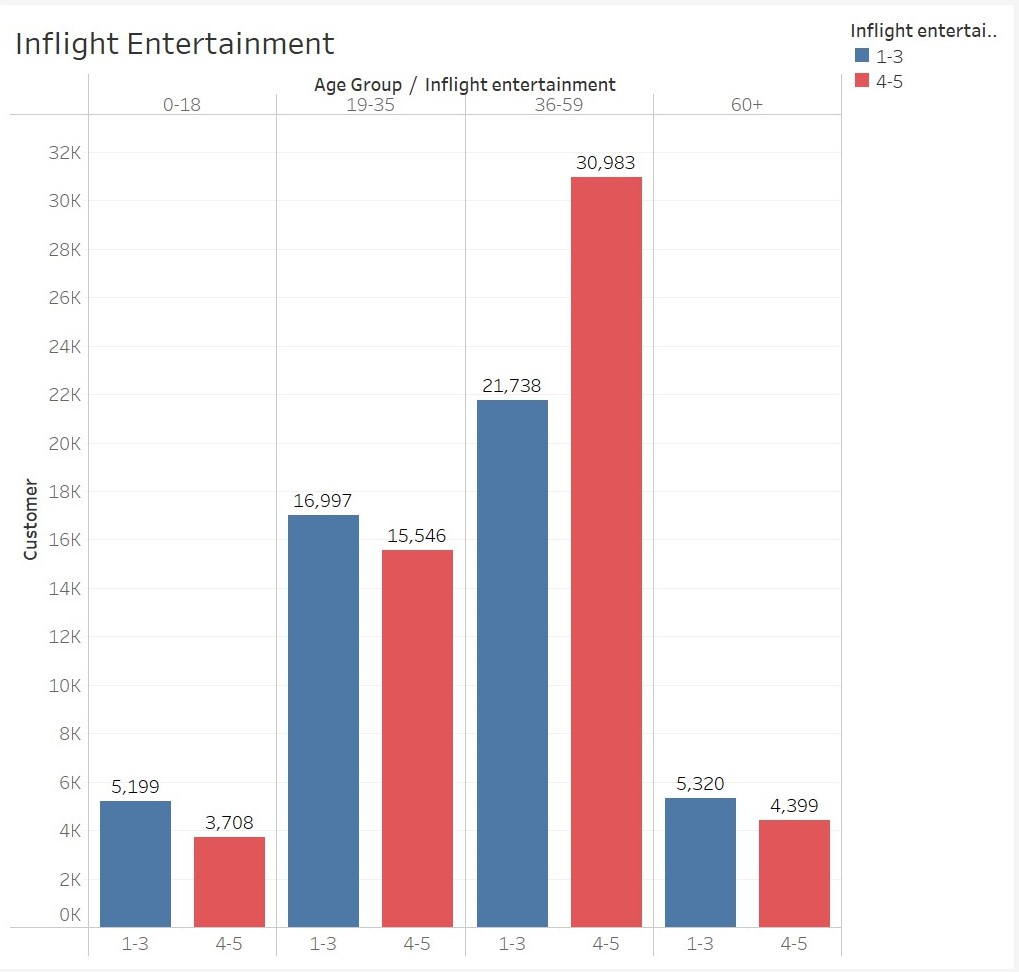



# 5.Gender


## A) Customer Gender

In [ ]:
  %%bigquery --project=ba775-team5-b2
SELECT Gender, count(Gender) as Number FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Gender

,Gender,Number
0,Female,65899
1,Male,63981


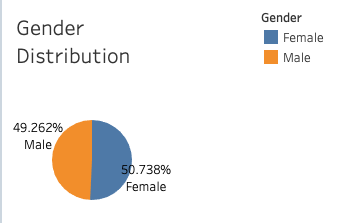

## B) How satisfied are male passengers and female passengers?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Gender, satisfaction, count(satisfaction) as Number
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Gender, satisfaction
Order by Gender


,Gender,satisfaction,Number
0,Female,neutral or dissatisfied,37630
1,Female,satisfied,28269
2,Male,neutral or dissatisfied,35822
3,Male,satisfied,28159


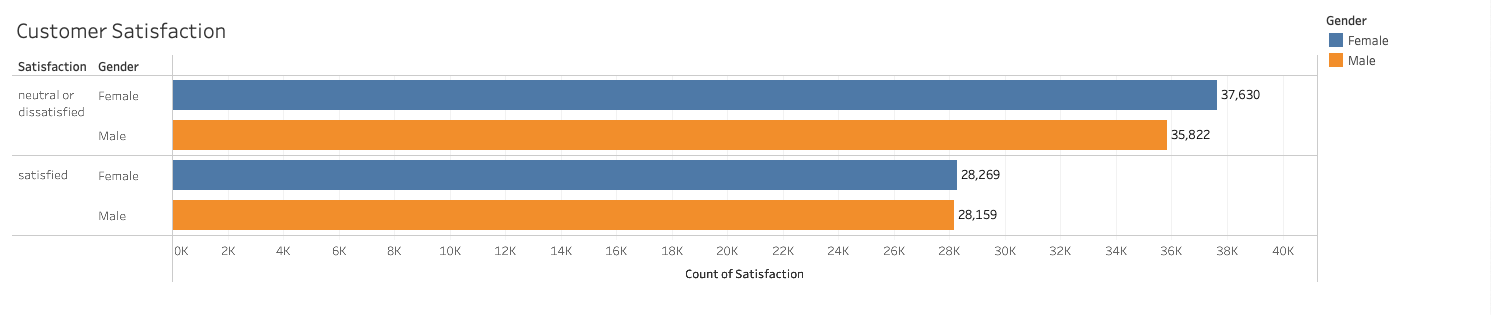

## C) What are the leading factors that make female and male customers dissatisfied or satisfied?

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT Gender, satisfaction,
avg(Inflight_wifi_service) as Inflight_wifi_service, 
avg(Departure_Arrival_time_convenient) as Departure_Arrival_time_convenient,
avg(Ease_of_Online_booking) Ease_of_Online_booking,
avg(Gate_location) Gate_location,
avg(Food_and_drink) Food_and_drink,
avg(Online_boarding) Online_boarding,
avg(Seat_comfort) Seat_comfort,
avg(Inflight_entertainment) Inflight_entertainment,
avg(On_board_service) On_board_service,
avg(Leg_room_service) Leg_room_service,
avg(Baggage_handling) Baggage_handling,
avg(Checkin_service) Checkin_service,
avg(Inflight_service) Inflight_service,
avg(Cleanliness) Cleanliness
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction` group by Gender,satisfaction
Order by Gender

,Gender,satisfaction,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,Female,neutral or dissatisfied,2.395934,3.105501,2.544247,2.985517,2.993622,2.811135,3.140420,2.898618,2.984640,2.886420,3.284427,3.032660,3.296067,2.967526
1,Female,satisfied,3.153631,2.962291,3.020942,2.968022,3.480562,3.980013,3.935159,3.957904,3.894266,3.875270,3.996392,3.645866,3.998868,3.702041
2,Male,neutral or dissatisfied,2.401038,3.156189,2.554799,2.974317,2.921445,2.498409,2.930406,2.885936,3.056195,3.099715,3.469963,3.053794,3.487857,2.896321
3,Male,satisfied,3.163607,2.963848,3.032991,2.977698,3.570510,4.071878,3.997798,3.970525,3.817927,3.764622,3.937320,3.652154,3.943002,3.791150


## D) Analysis
- Females are more particular about:
  - online boarding
  - seat comfort

- Males are more particular about:
  - legroom

# 6.Preliminary Answers to our Project Goal

 Common results from data samples of one categorical variable:
- From our preliminary research of class, customer type, travel type, age, and gender variables, we see ratings that strongly and weakly affect customer satisfaction.

- Some common factors that led to the disparity of satisfaction include inflight entertainment, legroom, food + drink, cleanliness, and seat comfort.

But statistically, the strongest variables were:
- Online Boarding 
- Inflight Wifi Service 


From our preliminary data search, we also found variables that are not statistically relevant in determining customer satisfaction.  The biggest being Gate location but some others that were found in commonality were ease of booking, departure convenience. 

# 7.BQML

## A) Preparing data for Binary Classification

In [ ]:
%%bigquery --project=ba775-team5-b2
create or replace table Airline_satisfaction.satisfaction_data
as
Select * EXCEPT(satisfaction), CASE
When satisfaction = 'neutral or dissatisfied' then 0
else 1
end as satisfaction_updated
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction`


""


## B) Creating the model

In [ ]:
%%bigquery --project=ba775-team5-b2
CREATE OR REPLACE MODEL Airline_satisfaction.satisfaction_model
OPTIONS
  ( model_type='LOGISTIC_REG',
    auto_class_weights=TRUE,
    input_label_cols=['satisfaction_updated']
  ) AS
SELECT
  * EXCEPT(int64_field_0, id)
FROM
  `Airline_satisfaction.satisfaction_data`


""


## C) Evaluating the model with 20% of the original data

In [ ]:
%%bigquery --project=ba775-team5-b2
SELECT *
FROM ML.EVALUATE
(
    MODEL `Airline_satisfaction.satisfaction_model`,  
    (SELECT * FROM `ba775-team5-b2.TestDataset.Test_data`)
)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.854843,0.842848,0.868186,0.848803,0.340262,0.925397


## D) Predicting Satisfaction

In [ ]:
%%bigquery --project=ba775-team5-b2
CREATE OR REPLACE TABLE ba775-team5-b2.TestDataset.prediction
AS
SELECT 
    satisfaction_updated,* except (id,int64_field_0,satisfaction_updated)
FROM ML.PREDICT
(
    MODEL `Airline_satisfaction.satisfaction_model`,
    (SELECT * FROM `ba775-team5-b2.TestDataset.Test_data`), 
    STRUCT(0.30 AS threshold)
)


""


In [ ]:
%%bigquery --project=ba775-team5-b2
select satisfaction_updated as actual_satisfaction,predicted_satisfaction_updated as predicted_satisfaction, count(predicted_satisfaction_updated) as Customers
from `ba775-team5-b2.TestDataset.prediction`
group by satisfaction_updated,predicted_satisfaction_updated limit 5

,actual_satisfaction,predicted_satisfaction,Customers
0,0,0,11215
1,1,0,1133
2,1,1,10270
3,0,1,3358


## E) What will the overall satisfaction be if Online boarding rating and Inflight wifi service are to increase to 5?

In [ ]:
%%bigquery --project=ba775-team5-b2
create or replace table TestDataset.satisfaction_forecast
as
Select * EXCEPT(Online_boarding,satisfaction_updated,Inflight_wifi_service), CASE
When Online_boarding = 1 then 5
else 5
end as Online_boarding,
CASE
When Inflight_wifi_service = 1 then 5
else 5
end as Inflight_wifi_service
FROM `ba775-team5-b2.Airline_satisfaction.satisfaction_data`

""


In [ ]:
%%bigquery --project=ba775-team5-b2
CREATE OR REPLACE TABLE ba775-team5-b2.TestDataset.satisfaction_forecast_prediction
AS
SELECT 
    * except (id,int64_field_0)
FROM ML.PREDICT
(
    MODEL `Airline_satisfaction.satisfaction_model`,
    (SELECT * FROM `ba775-team5-b2.TestDataset.satisfaction_forecast`), 
    STRUCT(0.30 AS threshold)
)


""


In [ ]:
%%bigquery --project=ba775-team5-b2
select predicted_satisfaction_updated as predicted_satisfaction, count(predicted_satisfaction_updated) as Customers
from `ba775-team5-b2.TestDataset.satisfaction_forecast_prediction`
group by predicted_satisfaction_updated

,predicted_satisfaction,Customers
0,1,113464
1,0,16416


## F) Analysis
- If the airline is to improve Online boarding service and increase the rating to 5, per the model, we have 90% confidence that the customer satisfaction rate will increase to 87% from 43%.
- Although it's not very useful to predict a particular customer's over satisfaction given all the ratings of the customer, however, the model will be helpful to estimate the impact of a particular factor on overall satisfaction. With this model, we are able to estimate with 90% confidence how much overall satisfaction will increasewhen a particular factor is increased by 1 unit.

# 8.Distribution of satisfaction and dissatisfaction for each factor

In [ ]:
import pandas as pd
from pandas.io import gbq
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

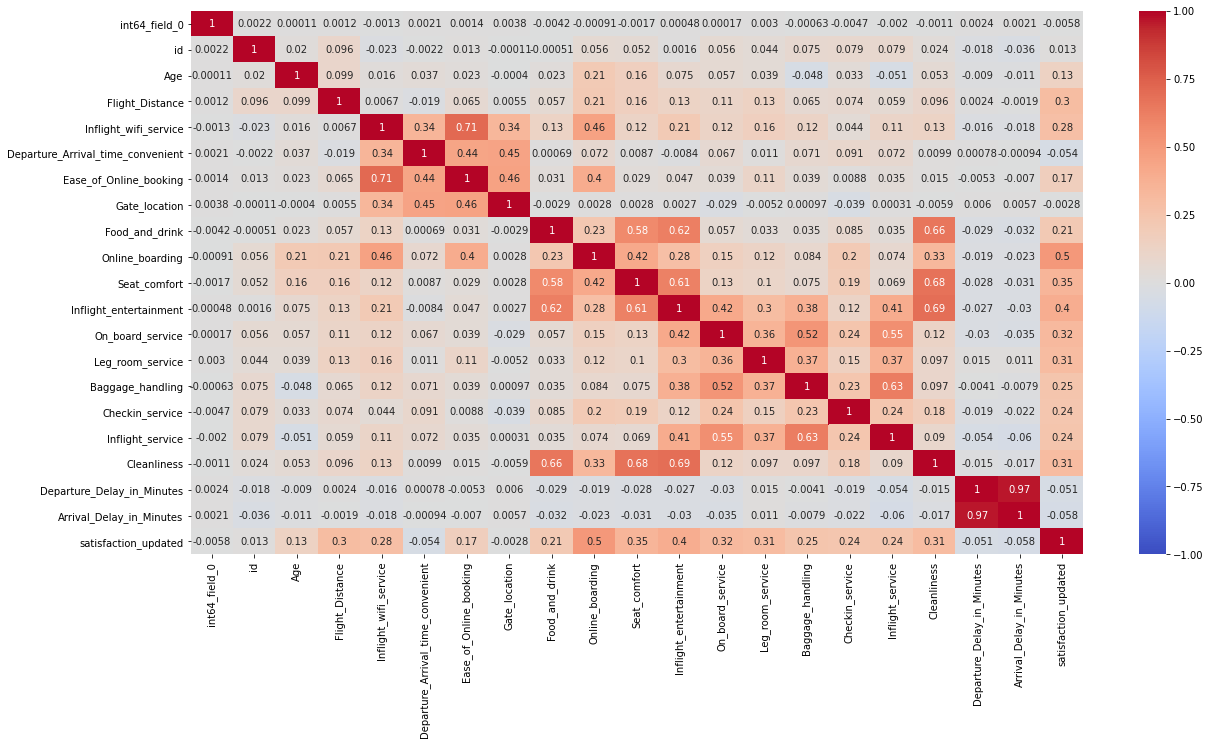

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(survey.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')

In [ ]:
survey = """SELECT * FROM `ba775-team5-b2.Airline_satisfaction.satisfaction_data`"""
survey = gbq.read_gbq(survey,project_id="ba775-team5-b2")

Text(0, 0.5, 'Probability Density')

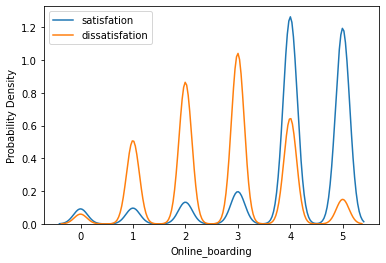

In [ ]:
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 1),'Online_boarding'], label='satisfation' )
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 0),'Online_boarding'], label='dissatisfation' )
plt.legend()
plt.ylabel('Probability Density')


Text(0, 0.5, 'Probability Density')

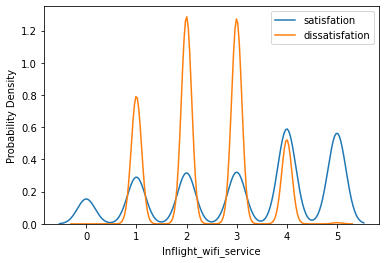

In [ ]:
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 1),'Inflight_wifi_service'], label='satisfation' )
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 0),'Inflight_wifi_service'], label='dissatisfation' )
plt.legend()
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

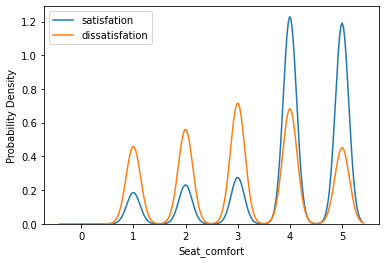

In [ ]:
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 1),'Seat_comfort'], label='satisfation' )
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 0),'Seat_comfort'], label='dissatisfation' )
plt.legend()
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

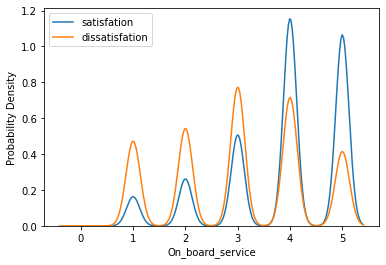

In [ ]:
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 1),'On_board_service'], label='satisfation' )
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 0),'On_board_service'], label='dissatisfation' )
plt.legend()
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

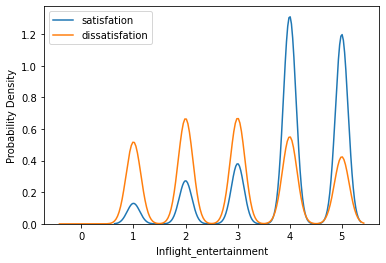

In [ ]:
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 1),'Inflight_entertainment'], label='satisfation' )
sns.kdeplot(survey.loc[(survey['satisfaction_updated']== 0),'Inflight_entertainment'], label='dissatisfation' )
plt.legend()
plt.ylabel('Probability Density')

# 9.Project conlcusion

In this project, our goal was to find variables that lead to customer satisfaction.  In order to find these answers, we compared satisfaction data against each categorical variable to get clear picture on its different effects. Next, we wanted to find the avergaes of each rating to be able to make assumptions about which ratings might be most statistically relevant.  But, this answer had a flaw.  We needed to calculate the count of each vote to be able to justify the averages.  Once we found the count of each rating, we concluded that online Boarding, Inflight Entertainment, cleanliness and on board service were important in determining customer satisfaction. 

We created a heatmap to test the correlation of each rating with satisfaction and found that the top 5 ratings were: Online Boarding, Inflight Entertainment, Seat Comfort, Leg Room, and on board service. However, we won't be able to know the type of customers who value these services the most. As a result, we deep dive into each type of customers to see what the most valued services are for them. Therefore, we are not only able to suggest the management what services they might want to improve, but also able to identify for whom they might want to improve these services.

With the Logistic Regression model, we are able to help answer business questions such as:  what do their ratings need to be if they want to have 75% or 80% of satisfaction. If the airline could improve the ratings of Online Boarding and Inflight Wifi Service to 5, their satisfaction rate would jump from 43% to 87%.

# 10.Tableau Dashboard

https://public.tableau.com/views/SQLProjectDashboards/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

https://public.tableau.com/shared/3JD4TJ9TF?:display_count=n&:origin=viz_share_link